<a href="https://colab.research.google.com/github/sau-rabh999/Deep-Learning/blob/main/working_on_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

In [ ]:
#uploading the MNIST dataset
(x_train,y_train) , (x_test,y_test) = keras.datasets.mnist.load_data()

In [ ]:
len(x_train)

60000

In [ ]:
len(x_test)

10000

In [ ]:
x_train[0].shape

(28, 28)

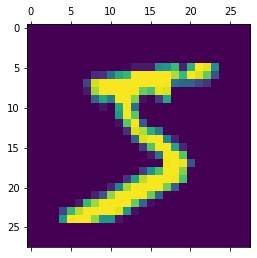

In [ ]:
plt.matshow(x_train[0])

In [ ]:
y_train[0]

5

In [ ]:
#building the neural network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),      #flattening the 28*28 array to 784*1
                          keras.layers.Dense(100, activation= 'relu'),    #hidden layer
                          keras.layers.Dense(10 , activation= 'sigmoid')  #output layer                    
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train , y_train , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.4799 - accuracy: 0.8439
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3859 - accuracy: 0.9060
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2815 - accuracy: 0.9273
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2401 - accuracy: 0.9363
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2305 - accuracy: 0.9418
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2119 - accuracy: 0.9467
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2006 - accuracy: 0.9493
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1907 - accuracy: 0.9516
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1847 - accuracy: 0.9542
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.181

In [ ]:
#evaluating the accuracy on test dataset

model.evaluate(x_test , y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2476 - accuracy: 0.9487


[0.24756227433681488, 0.9487000107765198]

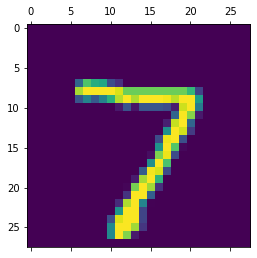

In [ ]:
#testing the model on random test dataset
plt.matshow(x_test[0])

In [ ]:
y_predict = model.predict(x_test)

In [ ]:
y_predict[0]

array([2.64687052e-21, 4.66168260e-09, 9.55690416e-10, 1.65662803e-10,
       1.07884045e-13, 1.18171939e-09, 6.34389491e-36, 2.29689479e-03,
       4.57343073e-15, 3.48655566e-12], dtype=float32)

In [ ]:
np.argmax(y_predict[0])

7

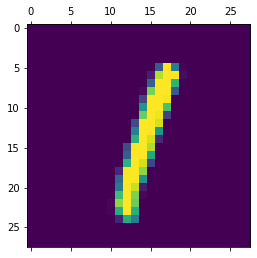

In [ ]:
plt.matshow(x_test[5])

In [ ]:
np.argmax(y_predict[5])

1

In [ ]:
#predicting first 10 data
y_predict_labels = [np.argmax(i) for i in y_predict]
y_predict_labels[:10]

[7, 0, 1, 0, 0, 1, 1, 9, 5, 1]

In [ ]:
#displaying first 10 values from test dataset
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [ ]:
#confusion matrix
cm = tf.math.confusion_matrix(labels = y_test , predictions = y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[925,   0,   2,   1,   0,   0,   3,   3,  46,   0],
       [168, 943,   1,   1,   0,   2,   5,   1,  13,   1],
       [960,  14,  34,   1,   0,   0,   0,   5,  17,   1],
       [866,  62,  41,  18,   0,   7,   0,   1,  10,   5],
       [310, 296, 281,  12,  71,   0,   3,   0,   5,   4],
       [320,  68,  38, 122,   1, 315,  16,   0,  10,   2],
       [302,   2,  14,   0,   8, 119, 503,   0,  10,   0],
       [  7, 119,  44,  10,  11,   3,   0, 815,  12,   7],
       [495,  23,  79,  11,   4,  15,   8,   2, 334,   3],
       [ 25, 424, 243,  47, 106,  11,   0,   6,  13, 134]], dtype=int32)>

Text(69.0, 0.5, 'Truth')

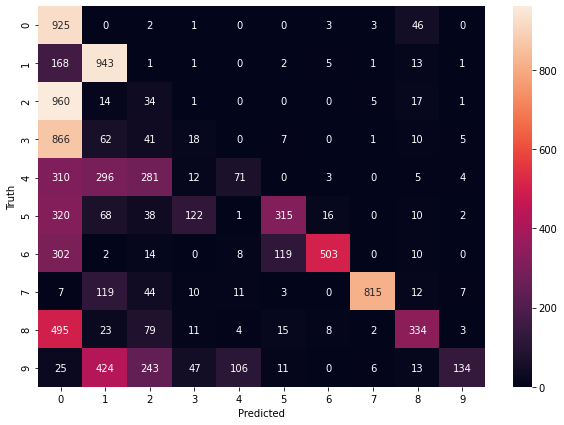

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm , annot = True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')